In [1]:
# import statements

from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library

import matplotlib.pyplot as plt # this is for plotting (showing) images

In [17]:
# load an image

# location of image data -- change this to wherever the lab data is kept
data_dir = './'

image = Image.open(data_dir + 'clones_2.png')

# print some information about the image

print('image format is ', image.format)
print('image mode is ', image.mode)
print('image size is ', image.size)

image format is  PNG
image mode is  RGB
image size is  (1024, 1024)


In [18]:
im = np.asarray(image)

print('image array type ', im.dtype)
print('image array shape ', im.shape)

image array type  uint8
image array shape  (1024, 1024, 3)


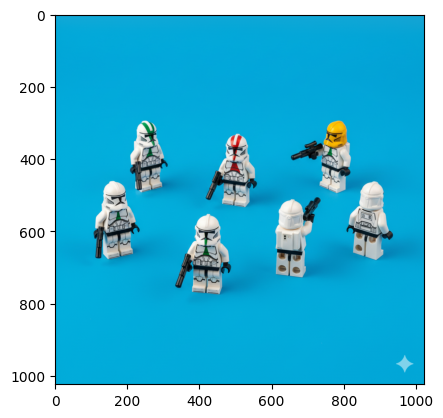

In [19]:
# now we can use pyplot.imshow to display the image

plt.imshow(im)
plt.show()

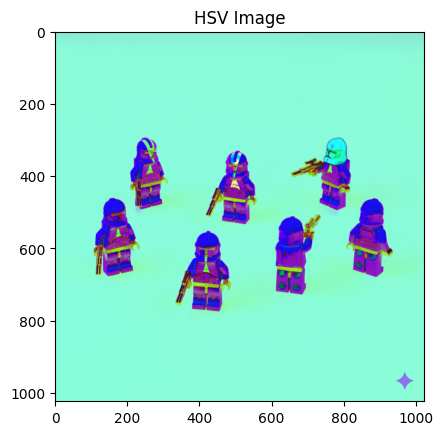

In [20]:
# Convert RGB → HSV for color segmentation
def rgb_to_hsv(im):
    return matplotlib.colors.rgb_to_hsv(im / 255.0)

import matplotlib.colors
hsv = rgb_to_hsv(im)
plt.imshow(hsv)
plt.title("HSV Image")
plt.show()


In [43]:
# HSV colour thresholds
rank_thresholds = {
    "white":   { "low": np.array([0.0, 0.0, 0.6]), "high": np.array([1.0, 0.3, 1.0]) },
    "green":   { "low": np.array([0.1, 0.25, 0.10]), "high": np.array([0.5, 1.0, 1.0]) },
    "red":     { "low": np.array([0.95, 0.3, 0.2]), "high": np.array([1.00, 1.0, 1.0]) },
    "yellow":  { "low": np.array([0.12, 0.3, 0.2]), "high": np.array([0.18, 1.0, 1.0]) },
}


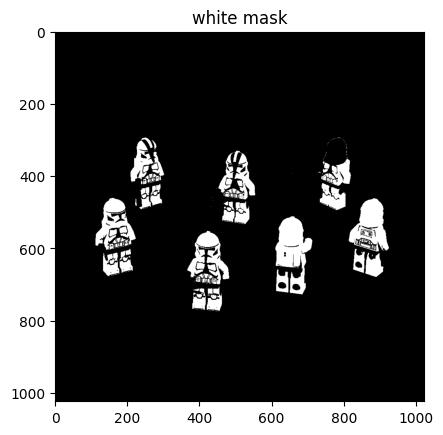

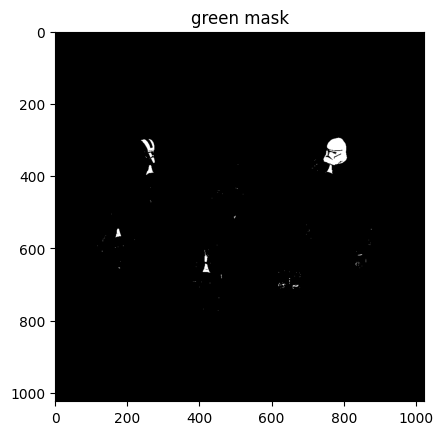

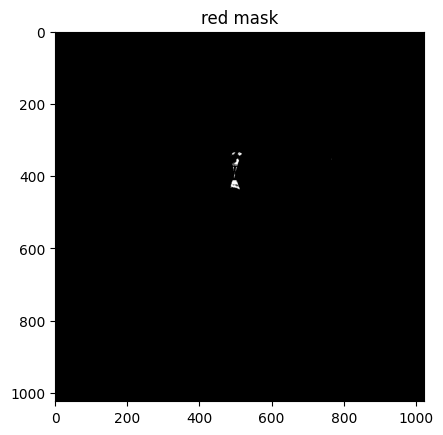

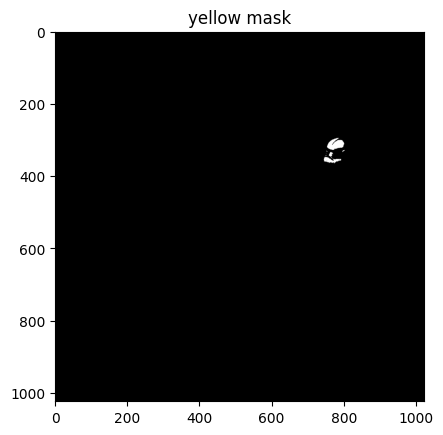

In [44]:
def get_mask(hsv_img, low, high):
    return np.all((hsv_img >= low) & (hsv_img <= high), axis=2)

masks = {}
for rank, t in rank_thresholds.items():
    masks[rank] = get_mask(hsv, t["low"], t["high"])
    plt.imshow(masks[rank], cmap='gray')
    plt.title(f"{rank} mask")
    plt.show()


In [45]:
from scipy.ndimage import label, find_objects

def extract_bounding_boxes(mask):
    labeled, num = label(mask)
    boxes = find_objects(labeled)
    return boxes

rank_boxes = {r: extract_bounding_boxes(m) for r, m in masks.items()}


In [46]:
# Store final trooper detections: (bbox, rank)
detections = []

for rank, boxes in rank_boxes.items():
    for b in boxes:
        y1, y2 = b[0].start, b[0].stop
        x1, x2 = b[1].start, b[1].stop
        # ignore tiny noise components
        if (x2 - x1) * (y2 - y1) < 200:  
            continue
        detections.append(((x1, y1, x2, y2), rank))


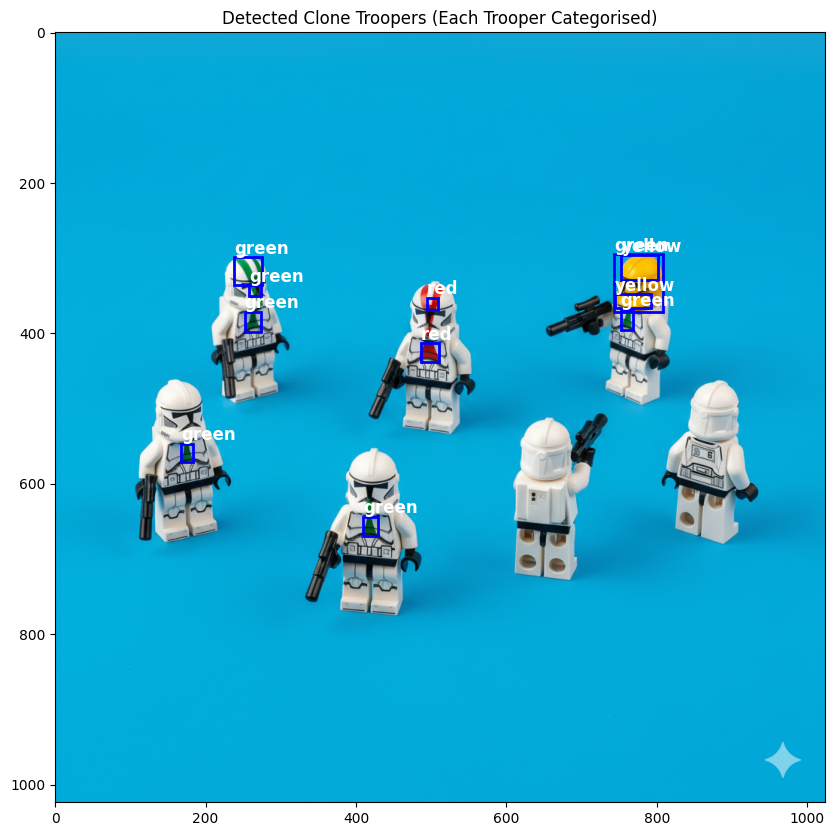

In [47]:
plt.figure(figsize=(10, 10))
plt.imshow(im)
ax = plt.gca()

for (x1, y1, x2, y2), rank in detections:
    if rank != 'white':
        # Draw bounding box around each trooper
        ax.add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                edgecolor='blue',   # box colour
                fill=False,
                linewidth=2
            )
        )

        # Add the rank label above the box
        ax.text(
            x1,
            y1 - 5,
            rank,
            color='white',
            fontsize=12,
            weight='bold'
        )

plt.title("Detected Clone Troopers (Each Trooper Categorised)")
plt.show()
